In [74]:
import numpy as np
import math
import random
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
united_states_map = mpimg.imread("tunisia roadmap-pica.png")
def show_cities(path):
    """Plot the cities as red circles."""
    if isinstance(path, dict):
        path = list(path.values())
    if isinstance(path[0][0], str):
        path = [item[1] for item in path]

    for x0, y0 in path:
        plt.plot(x0, y0, 'o', color='#f51d3a', markersize=10)  # 'ro' = red circles
def show_path(path, starting_city=None):
    """Plot the TSP path connecting the cities."""
    if isinstance(path, dict):
        path = list(path.values())
    if isinstance(path[0][0], str):
        path = [item[1] for item in path]

    starting_city = starting_city or path[0]
    x, y = list(zip(*path))

    plt.plot(x + x[:1], y + y[:1], '#29783f')

In [75]:
import math
import time
from itertools import combinations
def distance(xy1, xy2) -> float:
    if isinstance(xy1[0], str): xy1 = xy1[1]; xy2 = xy2[1];               # if xy1 == ("Name", (x,y))
    return math.sqrt( (xy1[0]-xy2[0])**2 + (xy1[1]-xy2[1])**2 )

def path_distance(path) -> int:
    if isinstance(path, dict):      path = list(path.values())            # if path == {"Name": (x,y)}
    if isinstance(path[0][0], str): path = [ item[1] for item in path ]   # if path == ("Name", (x,y))
    return int(sum(
        [ distance(path[i],  path[i+1]) for i in range(len(path)-1) ]
      + [ distance(path[-1], path[0]) ]                                   # include cost of return journey
    ))
def measure_execution_time(path, repetitions):
    start_time = time.perf_counter()  # Use a higher resolution timer
    for _ in range(repetitions):  # Run the function multiple times
        path_distance(path)
    end_time = time.perf_counter()
    execution_time = (end_time - start_time) 
    print(f"Average execution time over {repetitions} runs: {execution_time:.6f} seconds")

def generate_distance_dict(cities):
    """Create a distance dictionary with all city pairs"""
    distances = {}
    city_names = [city[0] for city in cities]
    
    for (name1, coords1), (name2, coords2) in combinations(cities, 2):
        dist = distance(coords1, coords2)
        distances[(name1, name2)] = dist
        distances[(name2, name1)] = dist  # Add reverse direction
        
    return distances



24


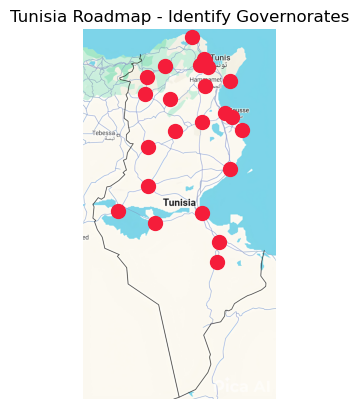

In [76]:
cities = { 
    "Tunis": (1118.8, 288.4),
    "Ariana":	(1102.5, 270.5),
    "Ben Arous":	(1145.8, 348.0),
    "Mannouba":	(1065.7, 327.8),
    "Bizerte"	:(995.7, 71.0),
    "Nabeul":	(1348.2, 468.0),
    "Béja":	(747.6, 336.6),
    "Jendouba":	(579.8, 438.0),
    "Zaghouan":	(1118.8, 520.0),
    "Siliana":	(798.6, 641.0),
    "Le Kef":	(561.6, 592.0),
    "Sousse":	(1297.6, 766.5),
    "Monastir":	(1364.2, 804.3),
    "Mahdia":	(1454.3, 924.1),
    "Kasserine":	(589.6, 1079.3),
    "Sidi Bouzid":	(840.7, 932.4),
    "Kairouan":	(1089.0, 850.1),
    "Gafsa":	(589.0, 1434.0),
    "Sfax":	(1344.3, 1282.0),
    "Gabès":	(1090.6, 1683.1),
    "Médenine":	(1243.1, 1950.6),
    "Tozeur":	(319.8, 1665.3),
    "Kebili":	(654.4, 1775.0),
    "Tataouine":	(1224.1, 2134.0)    }
cities = list(sorted(cities.items()))
print(len(cities))
plt.imshow(united_states_map)
plt.title("Tunisia Roadmap - Identify Governorates")
plt.axis("off")
show_cities(cities)
plt.show()

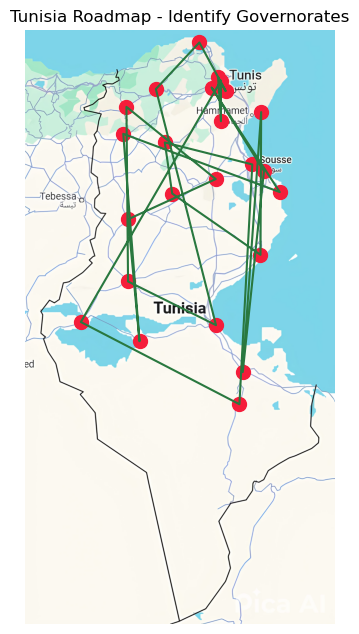

Average execution time over 1 runs: 0.000071 seconds
Average execution time over 100000 runs: 2.859296 seconds
Total distance: 18365


In [106]:
# Set up the figure first
plt.figure(figsize=(4, 8))
plt.imshow(united_states_map)
plt.title("Tunisia Roadmap - Identify Governorates")
plt.axis("off")

# Show the cities first (static)
show_cities(cities)
# Now draw the path with animation
show_path(cities)
plt.show()  
measure_execution_time(cities, repetitions=1)
measure_execution_time(cities, repetitions=100000)
print("Total distance:",path_distance(cities))

In [78]:
distances = generate_distance_dict(cities)
print(distances)
print(len(distances))

{('Ariana', 'Ben Arous'): 88.775784986673, ('Ben Arous', 'Ariana'): 88.775784986673, ('Ariana', 'Bizerte'): 226.2885105346712, ('Bizerte', 'Ariana'): 226.2885105346712, ('Ariana', 'Béja'): 361.0030747791492, ('Béja', 'Ariana'): 361.0030747791492, ('Ariana', 'Gabès'): 1412.6501229957826, ('Gabès', 'Ariana'): 1412.6501229957826, ('Ariana', 'Gafsa'): 1271.7761202350043, ('Gafsa', 'Ariana'): 1271.7761202350043, ('Ariana', 'Jendouba'): 548.8820820540602, ('Jendouba', 'Ariana'): 548.8820820540602, ('Ariana', 'Kairouan'): 579.7571991791046, ('Kairouan', 'Ariana'): 579.7571991791046, ('Ariana', 'Kasserine'): 957.7180430586028, ('Kasserine', 'Ariana'): 957.7180430586028, ('Ariana', 'Kebili'): 1569.813320111662, ('Kebili', 'Ariana'): 1569.813320111662, ('Ariana', 'Le Kef'): 629.2337085693995, ('Le Kef', 'Ariana'): 629.2337085693995, ('Ariana', 'Mahdia'): 742.2642386643721, ('Mahdia', 'Ariana'): 742.2642386643721, ('Ariana', 'Mannouba'): 68.0994126259544, ('Mannouba', 'Ariana'): 68.0994126259544,

In [79]:
class Ant:
    def __init__(self, start_city):
        self.path = [start_city]
        self.total_cost = 0

    def move(self, available_cities):
        next_city = random.choice(available_cities)
        last_city = self.path[-1]
        self.path.append(next_city)
        self.total_cost += distance[(last_city, next_city)]

    def complete_trip(self):
        # Return to start
        start_city = self.path[0]
        last_city = self.path[-1]
        self.path.append(start_city)
        self.total_cost += distance[(last_city, start_city)]

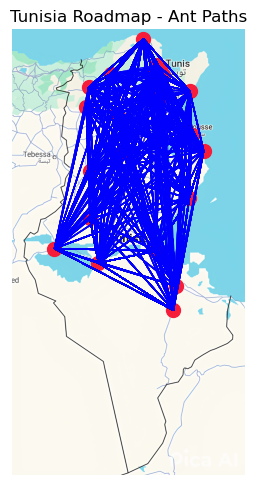

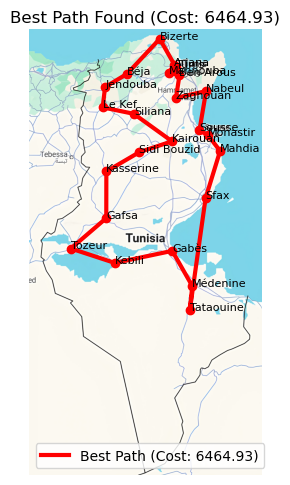

Ant 1: Path = ['Tunis', 'Ariana', 'Ben Arous', 'Mannouba', 'Kairouan', 'Sousse', 'Zaghouan', 'Béja', 'Jendouba', 'Le Kef', 'Monastir', 'Mahdia', 'Tozeur', 'Kebili', 'Kasserine', 'Sfax', 'Gabès', 'Médenine', 'Tataouine', 'Gafsa', 'Sidi Bouzid', 'Siliana', 'Nabeul', 'Bizerte', 'Tunis']
Total Cost = 10305.006714496922
Ant 2: Path = ['Tunis', 'Ariana', 'Mannouba', 'Siliana', 'Kairouan', 'Sfax', 'Mahdia', 'Monastir', 'Ben Arous', 'Béja', 'Bizerte', 'Jendouba', 'Le Kef', 'Sidi Bouzid', 'Gafsa', 'Kebili', 'Zaghouan', 'Sousse', 'Nabeul', 'Kasserine', 'Gabès', 'Tataouine', 'Médenine', 'Tozeur', 'Tunis']
Total Cost = 12131.085556571825
Ant 3: Path = ['Tunis', 'Mannouba', 'Ariana', 'Bizerte', 'Sousse', 'Monastir', 'Gafsa', 'Tozeur', 'Sfax', 'Kairouan', 'Sidi Bouzid', 'Siliana', 'Béja', 'Jendouba', 'Le Kef', 'Zaghouan', 'Nabeul', 'Ben Arous', 'Gabès', 'Mahdia', 'Médenine', 'Tataouine', 'Kasserine', 'Kebili', 'Tunis']
Total Cost = 13289.906428534576
Ant 4: Path = ['Tunis', 'Ariana', 'Zaghouan', 'Na

In [ ]:
for (city1, city2), dist in list(distances.items()):
    distances[(city2, city1)] = dist


alpha = 1  # Influence of pheromone
beta = 2   # Influence of heuristic (1/distance)
rho = 0.2  # Evaporation rate
Q = 100    # Pheromone deposit factor

# Initialize pheromone levels
pheromones = {}
for edge in distances:
    pheromones[edge] = 0.1

# Helper: calculate probability to move to next city
def calculate_probabilities(current_city, available_cities):
    probabilities = []
    denominator = 0
    for city in available_cities:
        tau = pheromones[(current_city, city)] ** alpha
        eta = (1 / distances[(current_city, city)]) ** beta
        denominator += tau * eta

    for city in available_cities:
        tau = pheromones[(current_city, city)] ** alpha
        eta = (1 / distances[(current_city, city)]) ** beta
        prob = (tau * eta) / denominator
        probabilities.append((city, prob))

    return probabilities

# Choose next city based on calculated probabilities
def select_next_city(probabilities):
    r = random.random()
    cumulative = 0.0
    for city, prob in probabilities:
        cumulative += prob
        if r <= cumulative:
            return city
    return probabilities[-1][0]

class Ant:
    def __init__(self, start_city):
        self.path = [start_city]
        self.total_cost = 0
    def move(self, available_cities):
        last_city = self.path[-1]
        probs = calculate_probabilities(last_city, available_cities)
        epsilon = 0.1  # 10% chance to pick random city
        if random.random() < epsilon:
            next_city = random.choice(available_cities)
        else:
            next_city = select_next_city(probs)

        self.path.append(next_city)
        cities_dict = {name: coords for name, coords in cities}
        last_coords = cities_dict[last_city]
        next_coords = cities_dict[next_city]
        # Calculate distance between last city and next city
        self.total_cost += distance(last_coords, next_coords)
        

    def complete_trip(self):
        # Return to start
        start_city = self.path[0]
        last_city = self.path[-1]
        
        self.path.append(start_city)
        cities_dict = {name: coords for name, coords in cities}
        last_coords = cities_dict[last_city]
        start_coords = cities_dict[start_city]
        # Calculate distance between last city and next city
        self.total_cost += distance(last_coords, start_coords)



def update_pheromones(ants):
    global pheromones
    # Evaporation
    for edge in pheromones:
        pheromones[edge] *= (1 - rho)

    # Deposit
    for ant in ants:
        contribution = Q / ant.total_cost
        for i in range(len(ant.path) - 1):
            edge = (ant.path[i], ant.path[i+1])
            pheromones[edge] += contribution
            pheromones[(edge[1], edge[0])] += contribution

def run_simple_simulation():
    city_names = [city[0] for city in cities]
    best_path = None
    best_cost = float('inf')
    ants = [Ant(start_city='Tunis') for _ in range(10)]  # 3 ants starting from Tunis
    cities_dict = {name: coords for name, coords in cities}

    # Initialize plot
    fig, ax = plt.subplots(figsize=(3, 6))
    ax.imshow(united_states_map)
    ax.set_title("Tunisia Roadmap - Ant Paths")
    ax.axis("off")
    show_cities(cities)  # Plot cities once

    for ant in ants:
        available_cities = city_names.copy()  # Create a copy of city names
        available_cities.remove('Tunis')  # Remove starting city

        while available_cities:
            ant.move(available_cities)
            available_cities.remove(ant.path[-1])

        ant.complete_trip()
        update_pheromones([ant])
        if ant.total_cost < best_cost:
                best_cost = ant.total_cost
                best_path = ant.path
        # Convert path to coordinates
        path_coords = np.array([cities_dict[city] for city in ant.path])
    

        # Plot current ant's path (transparent to show overlaps)
        ax.plot(path_coords[:, 0], path_coords[:, 1], 'b-', alpha=0.3, linewidth=1)
        #
        plt.draw() 

    #best path plot
    plt.figure(figsize=(3, 6))
    plt.imshow(united_states_map)
    plt.title(f"Best Path Found (Cost: {best_cost:.2f})")
    plt.axis('off')
    
    # Plot all cities
    for city, coords in cities:
        plt.plot(coords[0], coords[1], 'ro')  # Red dots for cities
        plt.text(coords[0], coords[1], city, fontsize=8)
    
    # Convert and plot best path
    best_path_coords = np.array([cities_dict[city] for city in best_path])
    plt.plot(best_path_coords[:, 0], best_path_coords[:, 1], 
            'r-', linewidth=3, label=f"Best Path (Cost: {best_cost:.2f})")
    
    plt.legend()
    plt.show()
    
    

    # Print all ants paths
    for i, ant in enumerate(ants):
        print(f"Ant {i+1}: Path = {ant.path}")
        print(f"Total Cost = {ant.total_cost}")
    
    print(f"Best Path Found: {best_path}")
    print(f"Shortest Distance: {best_cost}")
    #print("Updated Pheromones:")
    #for edge, pheromone in pheromones.items():
    #    print(f"{edge}: {pheromone:.4f}")
run_simple_simulation()